Import the required packages with their customary aliases as follows:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Use the %matplotlib inline magic command so that your plots show in the notebook without having to call plt.show() every time.

In [2]:
%matplotlib inline

Using the pandas read_csv() method, read the GDP dataset into your notebook as a DataFrame called gdp_df. Take a look at the first 6 rows.

In [3]:
gdp_df = pd.read_csv("../Data/gdp_percapita.csv", nrows=6868)
gdp_df.head(6)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,2065.036398,NaN
1,Afghanistan,2018,2033.779002,NaN
2,Afghanistan,2017,2058.383832,NaN
3,Afghanistan,2016,2057.062164,NaN
4,Afghanistan,2015,2068.265904,NaN
5,Afghanistan,2014,2102.385234,NaN


Repeat for the internet use dataset. Call this DataFrame internet_df. Take a look at the first six rows.

In [4]:
internet_df = pd.read_csv("../Data/internet_use.csv", nrows=4495)
internet_df.head(6)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN
5,Afghanistan,2009,3.550000,NaN


Look at the shape of each DataFrame - how many rows? How many columns?

In [5]:
gdp_df.shape

(6868, 4)

In [6]:
internet_df.shape

(4495, 4)

Take a look at the datatypes for the columns in each DataFrame.

In [7]:
gdp_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

In [8]:
internet_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

Take a look at the last 10 rows of each DataFrame in turn.

In [9]:
gdp_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
6858,Zimbabwe,1999,3600.849291,NaN
6859,Zimbabwe,1998,3653.920016,NaN
6860,Zimbabwe,1997,3580.048793,NaN
6861,Zimbabwe,1996,3520.430146,NaN
6862,Zimbabwe,1995,3226.413930,NaN
6863,Zimbabwe,1994,3263.934978,NaN
6864,Zimbabwe,1993,3033.504852,NaN
6865,Zimbabwe,1992,3054.889178,NaN
6866,Zimbabwe,1991,3426.598094,NaN
6867,Zimbabwe,1990,3324.348171,NaN


In [10]:
internet_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
4485,Zimbabwe,2002,3.994356,NaN
4486,Zimbabwe,2001,0.799846,NaN
4487,Zimbabwe,2000,0.401434,NaN
4488,Zimbabwe,1999,0.161676,NaN
4489,Zimbabwe,1998,0.081648,NaN
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN
4494,Zimbabwe,1990,0.000000,NaN


Drop the value footnotes column from both DataFrames. Check that this worked as expected.

In [14]:
gdp_df = gdp_df.drop(['Value Footnotes'], axis=1)

In [15]:
internet_df = internet_df.drop(['Value Footnotes'], axis=1)

Change the columns for the GDP Per Capita DataFrame to ‘Country’, ‘Year’, and ‘GDP_Per_Capita’.

In [17]:
gdp_df = gdp_df.rename(columns={'Country or Area': 'Country', 'Value': 'GDP_Per_Capita'})

Change the columns for the Internet Users DataFrame to ‘Country’, ‘Year’, and ‘Internet_Users_Pct’.

In [19]:
internet_df = internet_df.rename(columns={'Country or Area': 'Country', 'Value': 'Internet_Users_Pct'})

Merge the two DataFrames to one. Merge all rows from each of the two DataFrames. Call the new DataFrame gdp_and_internet_use.

In [21]:
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2019,2065.036398
1,Afghanistan,2018,2033.779002
2,Afghanistan,2017,2058.383832
3,Afghanistan,2016,2057.062164
4,Afghanistan,2015,2068.265904


In [22]:
internet_df.head()

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000


In [23]:
gdp_and_internet_use = internet_df.merge(gdp_df, on=["Country","Year"])

In [24]:
gdp_and_internet_use.shape

(3458, 4)

Look at the first five rows of your new DataFrame to confirm it merged correctly.

In [25]:
gdp_and_internet_use.head()

,Country,Year,Internet_Users_Pct,GDP_Per_Capita
0,Afghanistan,2014,6.390000,2102.385234
1,Afghanistan,2013,5.900000,2116.465454
2,Afghanistan,2012,5.454545,2075.491747
3,Afghanistan,2011,5.000000,1904.559799
4,Afghanistan,2010,4.000000,1957.029338


Look at the last five rows to make sure the data is clean and as expected.

In [26]:
gdp_and_internet_use.tail()

,Country,Year,Internet_Users_Pct,GDP_Per_Capita
3453,Zimbabwe,1997,0.033080,3580.048793
3454,Zimbabwe,1996,0.016790,3520.430146
3455,Zimbabwe,1995,0.007684,3226.413930
3456,Zimbabwe,1994,0.001739,3263.934978
3457,Zimbabwe,1990,0.000000,3324.348171


Subset the combined DataFrame to keep only the data for 2004, 2009, and 2014. Check that this happened correctly.

In [27]:
gdp_and_internet_use = gdp_and_internet_use[gdp_and_internet_use["Year"].isin([2004, 2009, 2014])]

In [29]:
gdp_and_internet_use.head(25)

,Country,Year,Internet_Users_Pct,GDP_Per_Capita
0,Afghanistan,2014,6.390000,2102.385234
5,Afghanistan,2009,3.550000,1758.904043
10,Afghanistan,2004,0.105809,1200.278256
13,Albania,2014,60.100000,11623.866679
18,Albania,2009,41.200000,10346.864199
23,Albania,2004,2.420388,7604.838002
34,Algeria,2014,18.090000,11512.705405
39,Algeria,2009,11.230000,10782.361398
44,Algeria,2004,4.634475,10058.435939
56,Angola,2014,21.260000,8239.828837


Create three new DataFrames, one for 2004, one for 2009, and one for 2014. Give them meaningful names that aren't too long.

In [32]:
gdp_internet2004 = gdp_and_internet_use[gdp_and_internet_use["Year"].isin([2004])]

In [33]:
gdp_internet2004.head(25)

,Country,Year,Internet_Users_Pct,GDP_Per_Capita
10,Afghanistan,2004,0.105809,1200.278256
23,Albania,2004,2.420388,7604.838002
44,Algeria,2004,4.634475,10058.435939
66,Angola,2004,0.464815,5593.241537
86,Antigua and Barbuda,2004,24.266544,18745.681534
107,Argentina,2004,16.036684,18032.610491
131,Armenia,2004,4.899009,6472.131214
153,Aruba,2004,23.000000,38984.218383
193,Austria,2004,54.280000,48718.669382
238,Bahrain,2004,21.458681,47661.508938


In [35]:
gdp_internet2009 = gdp_and_internet_use[gdp_and_internet_use["Year"].isin([2009])]

In [37]:
gdp_internet2009.head(25)

,Country,Year,Internet_Users_Pct,GDP_Per_Capita
5,Afghanistan,2009,3.55,1758.904043
18,Albania,2009,41.20,10346.864199
39,Algeria,2009,11.23,10782.361398
61,Angola,2009,6.00,7643.493749
81,Antigua and Barbuda,2009,42.00,20046.839017
102,Argentina,2009,34.00,21519.892554
126,Armenia,2009,15.30,9052.389818
148,Aruba,2009,58.00,35314.912883
166,Australia,2009,74.25,44910.450858
188,Austria,2009,73.45,51120.332050


In [38]:
gdp_internet2014 = gdp_and_internet_use[gdp_and_internet_use["Year"].isin([2014])]

In [39]:
gdp_internet2014.head(25)

,Country,Year,Internet_Users_Pct,GDP_Per_Capita
0,Afghanistan,2014,6.39000,2102.385234
13,Albania,2014,60.10000,11623.866679
34,Algeria,2014,18.09000,11512.705405
56,Angola,2014,21.26000,8239.828837
76,Antigua and Barbuda,2014,64.00000,18104.241470
97,Argentina,2014,64.70000,23550.099061
121,Armenia,2014,46.30000,11019.838785
143,Aruba,2014,83.78000,35458.608343
161,Australia,2014,84.56000,47436.748390
183,Austria,2014,81.00000,53025.847608


Which country had the highest percentage of internet users in 2014? What was the percentage? (Try typing the first 3 letters of your DataFrame name and hitting the tab key for auto-complete options).

In [41]:
print(gdp_internet2014[gdp_internet2014['Internet_Users_Pct']==gdp_internet2014['Internet_Users_Pct'].max()])

      Country  Year  Internet_Users_Pct  GDP_Per_Capita
1381  Iceland  2014               98.16      49652.1495


Which country had the lowest percentage of internet users in 2014? What was the percentage?

In [43]:
print(gdp_internet2014[gdp_internet2014['Internet_Users_Pct']==gdp_internet2014['Internet_Users_Pct'].min()])

          Country  Year  Internet_Users_Pct  GDP_Per_Capita
3087  Timor-Leste  2014                1.14      3264.56807


Repeat for 2004 and 2009.

In [44]:
print(gdp_internet2004[gdp_internet2004['Internet_Users_Pct']==gdp_internet2004['Internet_Users_Pct'].max()])

      Country  Year  Internet_Users_Pct  GDP_Per_Capita
1386  Iceland  2009                93.0    48177.084123


In [45]:
print(gdp_internet2004[gdp_internet2004['Internet_Users_Pct']==gdp_internet2004['Internet_Users_Pct'].min()])

          Country  Year  Internet_Users_Pct  GDP_Per_Capita
3092  Timor-Leste  2009            0.185252     2724.770973


In [46]:
print(gdp_internet2009[gdp_internet2009['Internet_Users_Pct']==gdp_internet2009['Internet_Users_Pct'].max()])

      Country  Year  Internet_Users_Pct  GDP_Per_Capita
1386  Iceland  2009                93.0    48177.084123


In [47]:
print(gdp_internet2009[gdp_internet2009['Internet_Users_Pct']==gdp_internet2009['Internet_Users_Pct'].min()])

          Country  Year  Internet_Users_Pct  GDP_Per_Capita
3092  Timor-Leste  2009            0.185252     2724.770973


In [48]:
print(gdp_internet2009['Internet_Users_Pct'].min()) #find a single value

0.185251509799805


Which country had the highest gdp per capita in 2014? What was the gdp per capita?

In [49]:
print(gdp_internet2014[gdp_internet2014['GDP_Per_Capita']==gdp_internet2014['GDP_Per_Capita'].max()])

         Country  Year  Internet_Users_Pct  GDP_Per_Capita
1798  Luxembourg  2014               94.67    108760.91603


Which country had the lowest gdp per capita in 2014? What was the gdp per capita?

In [50]:
print(gdp_internet2014[gdp_internet2014['GDP_Per_Capita']==gdp_internet2014['GDP_Per_Capita'].min()])

     Country  Year  Internet_Users_Pct  GDP_Per_Capita
540  Burundi  2014                1.38      886.235777


Create some scatterplots:

a. 2004 Percent Using the Internet vs GDP Per Capita

b. 2009 Percent Using the Internet vs GDP Per Capita

c. 2014 Percent Using the Internet vs GDP Per Capita

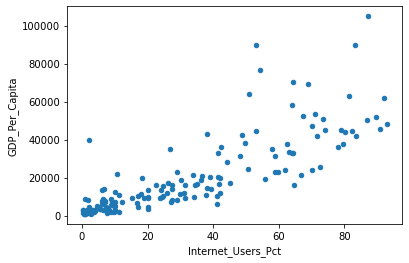

In [53]:
gdp_internet2004.plot(
   x='Internet_Users_Pct', 
   y='GDP_Per_Capita', 
   kind='scatter'
)

plt.show()

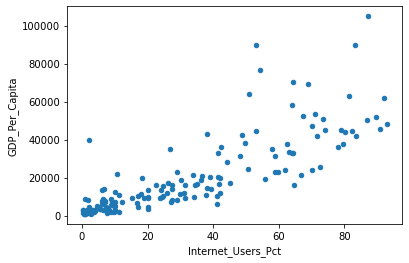

In [54]:
gdp_internet2009.plot(
   x='Internet_Users_Pct', 
   y='GDP_Per_Capita', 
   kind='scatter'
)

plt.show()

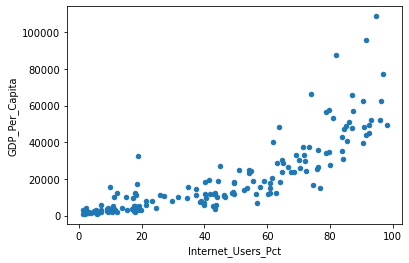

In [55]:
gdp_internet2014.plot(
   x='Internet_Users_Pct', 
   y='GDP_Per_Capita', 
   kind='scatter'
)

plt.show()

Are there differences across years? What do the plots tell you about any relationship between these two variables? Enter your observations as a markdown cell.

In [56]:
# Higher GDP yields higher internet usage. 

Look at the distribution of gdp per capita values for 2014. Is it unimodal?